In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [37]:
img = cv2.imread('./dataset/justin trudeau/Trudeau-head.jpg')
img.shape

(540, 540, 3)

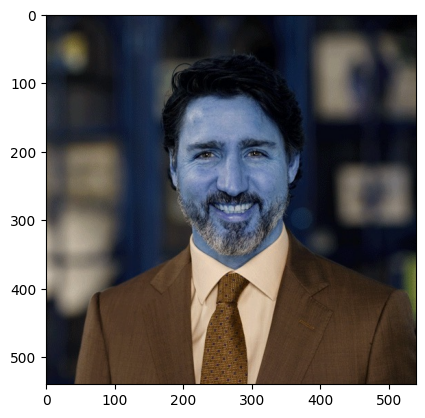

In [38]:
plt.imshow(img)

In [39]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img.shape

(540, 540)

In [40]:
gray_img

array([[25, 26, 25, ...,  8,  5, 11],
       [25, 30, 27, ...,  2, 13,  3],
       [26, 24, 28, ..., 12,  2, 16],
       ...,
       [19, 18, 20, ..., 27, 28, 28],
       [20, 19, 21, ..., 26, 28, 29],
       [21, 20, 21, ..., 26, 28, 30]], dtype=uint8)

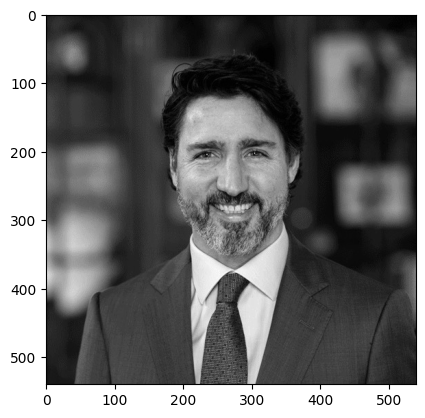

In [41]:
plt.imshow(gray_img, cmap='gray')

In [42]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray_img, 1.3,5)
faces

array([[163, 119, 214, 214]])

In [43]:
(x,y,w,h) = faces[0]

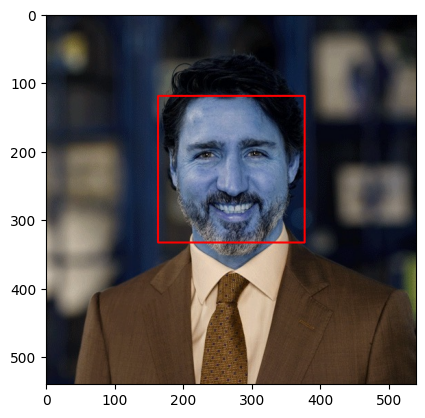

In [44]:
face_img = cv2.rectangle(img,(x,y),(x+w, y+h),(255,0,0),2)
plt.imshow(face_img)

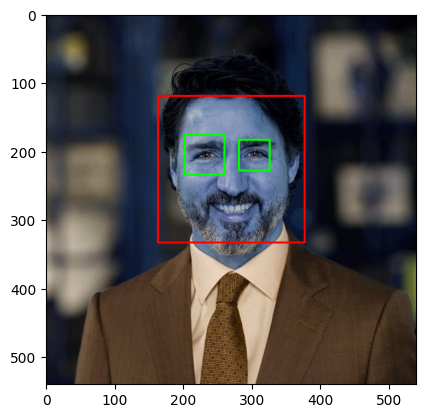

In [45]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w, y+h),(255,0,0),2)
    roi_gray = gray_img[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey),(ex+ew, ey+eh), (0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

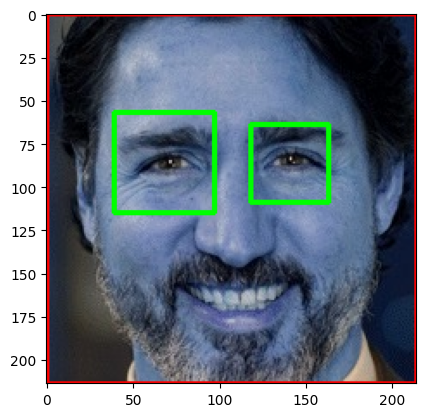

In [46]:
%matplotlib inline
plt.imshow(roi_color, cmap = 'gray')

In [68]:
def get_cropped_image_if_two_eyes(img_path):

    img = cv2.imread(img_path)

    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray_img[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

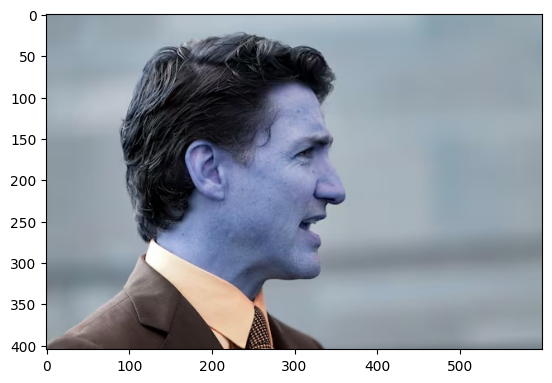

In [54]:
org_img = cv2.imread('./dataset/justin trudeau/4NH56IQVRNI4TKCT67F66JBY2Y.jpg')
plt.imshow(org_img)

In [55]:
cropped_img_2 = (get_cropped_image_if_two_eyes('./dataset/justin trudeau/4NH56IQVRNI4TKCT67F66JBY2Y.jpg'))
cropped_img_2

In [57]:
path_to_data = './dataset/'
path_to_cr_data = './dataset/cropped/'

In [58]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [59]:
img_dirs

['./dataset/joe biden',
 './dataset/justin trudeau',
 './dataset/narendra modi',
 './dataset/vladimir putin',
 './dataset/xi jinping']

In [60]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [67]:
cropped_image_dirs = []
file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    leader_name = img_dir.split('/')[-1]
    print(leader_name)
    file_names_dict[leader_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_two_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + leader_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("generating cropped images in folder ", cropped_folder)
            cropped_file_name = leader_name + str(count) + '.png'
            cropped_file_path = cropped_folder + '/' + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            file_names_dict[leader_name].append(cropped_file_path)
            count += 1               

joe biden
./dataset/joe biden\-1x-1 (1).jpg
[[[224 224 224]
  [224 224 224]
  [224 224 224]
  ...
  [ 12  23  21]
  [ 12  23  21]
  [ 12  23  21]]

 [[223 223 223]
  [223 223 223]
  [223 223 223]
  ...
  [ 13  24  22]
  [ 13  24  22]
  [ 13  24  22]]

 [[223 223 223]
  [223 223 223]
  [223 223 223]
  ...
  [ 13  24  22]
  [ 13  24  22]
  [ 13  24  22]]

 ...

 [[168 163 162]
  [169 164 163]
  [169 164 163]
  ...
  [ 46  34  28]
  [ 45  33  27]
  [ 46  34  28]]

 [[169 164 163]
  [168 163 162]
  [168 163 162]
  ...
  [ 46  34  28]
  [ 45  33  27]
  [ 46  34  28]]

 [[169 164 163]
  [168 163 162]
  [168 163 162]
  ...
  [ 46  34  28]
  [ 45  33  27]
  [ 46  34  28]]]
./dataset/joe biden\-1x-1.jpg
[[[106 173 164]
  [107 174 165]
  [108 175 166]
  ...
  [ 49 102  88]
  [ 49 104  89]
  [ 50 105  90]]

 [[107 174 165]
  [107 174 165]
  [108 175 166]
  ...
  [ 50 103  89]
  [ 50 105  90]
  [ 51 106  91]]

 [[107 174 165]
  [107 174 165]
  [108 175 166]
  ...
  [ 49 104  89]
  [ 50 105  90]
  

In [69]:
file_names_dict

{'joe biden': ['./dataset/cropped/joe biden/joe biden1.png',
  './dataset/cropped/joe biden/joe biden2.png',
  './dataset/cropped/joe biden/joe biden3.png',
  './dataset/cropped/joe biden/joe biden4.png',
  './dataset/cropped/joe biden/joe biden5.png',
  './dataset/cropped/joe biden/joe biden6.png',
  './dataset/cropped/joe biden/joe biden7.png',
  './dataset/cropped/joe biden/joe biden8.png',
  './dataset/cropped/joe biden/joe biden9.png',
  './dataset/cropped/joe biden/joe biden10.png',
  './dataset/cropped/joe biden/joe biden11.png',
  './dataset/cropped/joe biden/joe biden12.png',
  './dataset/cropped/joe biden/joe biden13.png',
  './dataset/cropped/joe biden/joe biden14.png',
  './dataset/cropped/joe biden/joe biden15.png',
  './dataset/cropped/joe biden/joe biden16.png',
  './dataset/cropped/joe biden/joe biden17.png',
  './dataset/cropped/joe biden/joe biden18.png',
  './dataset/cropped/joe biden/joe biden19.png',
  './dataset/cropped/joe biden/joe biden20.png',
  './dataset/cro